In [1]:
#nations_final.csv

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv('nations_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11 non-null     object 
 1   Australia      11 non-null     int64  
 2   United States  11 non-null     int64  
 3   Hawaii         11 non-null     int64  
 4   France         11 non-null     int64  
 5   Brazil         11 non-null     int64  
 6   South Africa   11 non-null     int64  
 7   Portugal       11 non-null     float64
 8   Ireland        11 non-null     float64
 9   Spain          11 non-null     float64
 10  New Zealand    11 non-null     float64
 11  Japan          11 non-null     float64
 12  Italy          11 non-null     float64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.2+ KB


In [5]:
df.head()

,Unnamed: 0,Australia,United States,Hawaii,France,Brazil,South Africa,Portugal,Ireland,Spain,New Zealand,Japan,Italy
0,2010-01-01,16,8,4,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01,14,7,3,2,6,2,1.0,0.0,0.0,0.0,0.0,0.0
2,2012-01-01,13,7,3,2,7,2,1.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-01,12,7,4,2,7,2,0.0,1.0,0.0,0.0,0.0,0.0
4,2014-01-01,13,5,3,2,7,2,1.0,1.0,1.0,0.0,0.0,0.0


In [6]:
df.drop(df.columns.difference(['Unnamed: 0','Brazil']), 1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,Brazil
0,2010-01-01,2
1,2011-01-01,6
2,2012-01-01,7
3,2013-01-01,7
4,2014-01-01,7


In [8]:
df.columns = ['ds','y']

In [9]:
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,2010-01-01,2
1,2011-01-01,6
2,2012-01-01,7
3,2013-01-01,7
4,2014-01-01,7


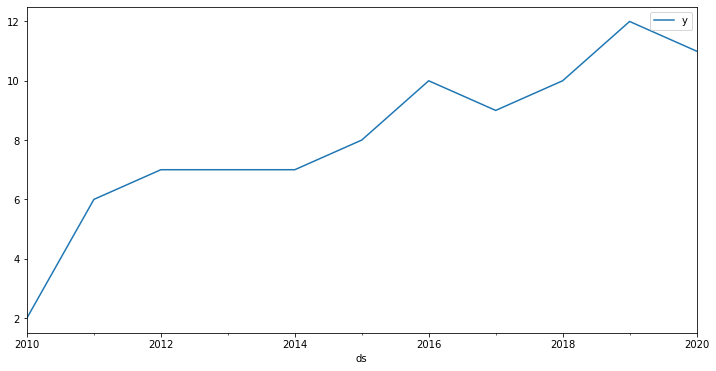

In [11]:
df.plot(x='ds',y='y',figsize=(12,6))

### Train test split

In [12]:
train = df.iloc[:8]
test = df.iloc[8:]

In [13]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=3,freq='AS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6,2016-01-01,8.540917,8.972131,11.165406,8.540917,8.540917,1.556762,1.556762,1.556762,1.556762,1.556762,1.556762,0.0,0.0,0.0,10.097678
7,2017-01-01,9.420430,8.185936,10.292697,9.420430,9.420430,-0.175168,-0.175168,-0.175168,-0.175168,-0.175168,-0.175168,0.0,0.0,0.0,9.245262
8,2018-01-01,10.297540,9.552303,11.729751,10.297540,10.297540,0.338696,0.338696,0.338696,0.338696,0.338696,0.338696,0.0,0.0,0.0,10.636236
9,2019-01-01,11.174650,11.000635,13.116997,11.174650,11.174650,0.916243,0.916243,0.916243,0.916243,0.916243,0.916243,0.0,0.0,0.0,12.090893
10,2020-01-01,12.051760,12.509016,14.666090,12.051760,12.051760,1.556762,1.556762,1.556762,1.556762,1.556762,1.556762,0.0,0.0,0.0,13.608522


In [15]:
test.tail()

,ds,y
8,2018-01-01,10
9,2019-01-01,12
10,2020-01-01,11


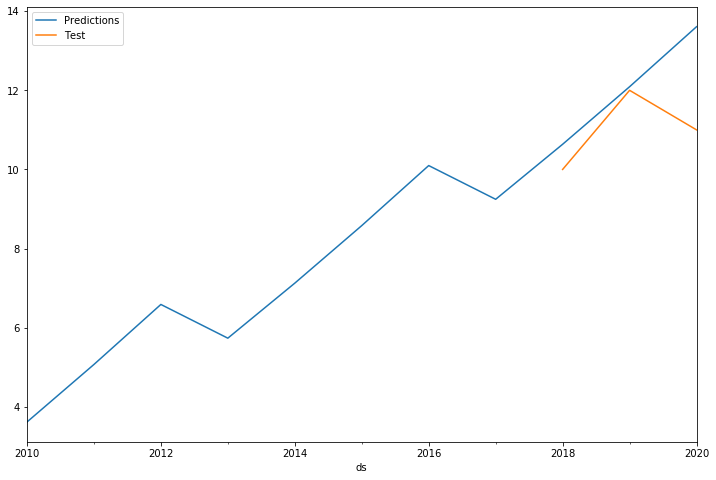

In [16]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='Test',legend=True,ax=ax)

In [17]:
import matplotlib.pyplot as plt

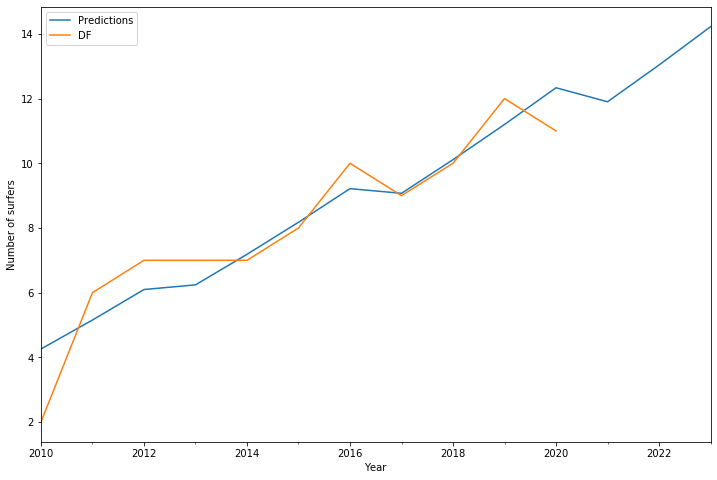

In [43]:
#Now to plot the predictions against the df

ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

df.plot(x='ds',y='y',label='DF',legend=True,ax=ax)

plt.xlabel('Year')
plt.ylabel('Number of surfers')

plt.savefig('fbp_predictions.jpeg')

### Evaluation on the strength of the model

In [19]:
from statsmodels.tools.eval_measures import rmse

In [20]:
predictions = forecast.iloc[-3:]['yhat']

In [21]:
predictions

8     10.636236
9     12.090893
10    13.608522
Name: yhat, dtype: float64

In [22]:
test['y']

8     10
9     12
10    11
Name: y, dtype: int64

In [23]:
rmse(predictions,test['y'])

1.551068839842785

In [24]:
#To see what the error is in proportion to the dataset

(rmse(predictions,test['y']) / test.mean()) *100

y    14.100626
dtype: float64

### Prophet Diagnostics

In [25]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [26]:
len(df)

11

In [27]:
len(df)/3

3.6666666666666665

In [28]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [29]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-01-02 00:00:00 and 2016-01-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-01-01,9.603435,8.550006,10.739204,9,2016-01-02


In [31]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,0.364133,0.603435,0.603435,0.067048,0.067048,1.0


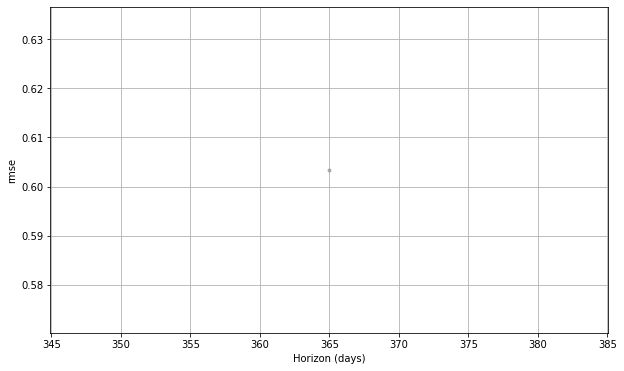

In [32]:
#RMSE

plot_cross_validation_metric(df_cv,metric='rmse');

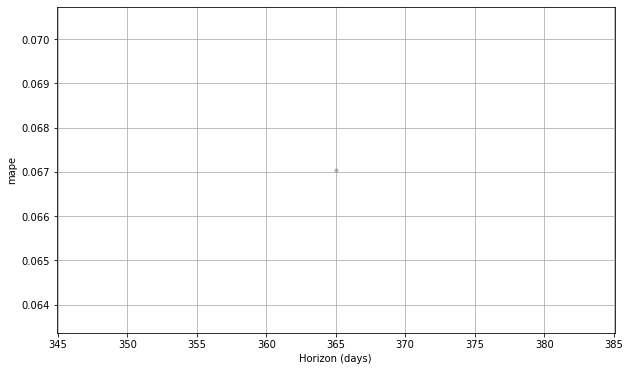

In [33]:
plot_cross_validation_metric(df_cv, metric='mape');

### Looking at the change points in the data

In [34]:
from fbprophet.plot import add_changepoints_to_plot

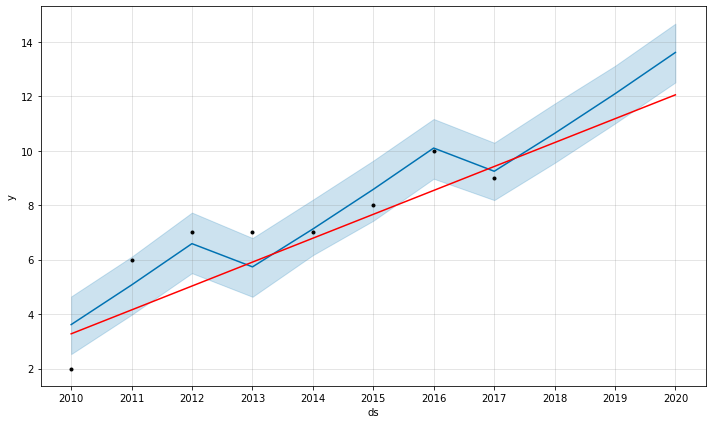

In [35]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

There is not enough data here to determine whether there are any change points.

This just shows an upward trend in the data. 

### Change in seasonality

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
df.head()

,ds,y
0,2010-01-01,2
1,2011-01-01,6
2,2012-01-01,7
3,2013-01-01,7
4,2014-01-01,7


### Retrain on full df

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


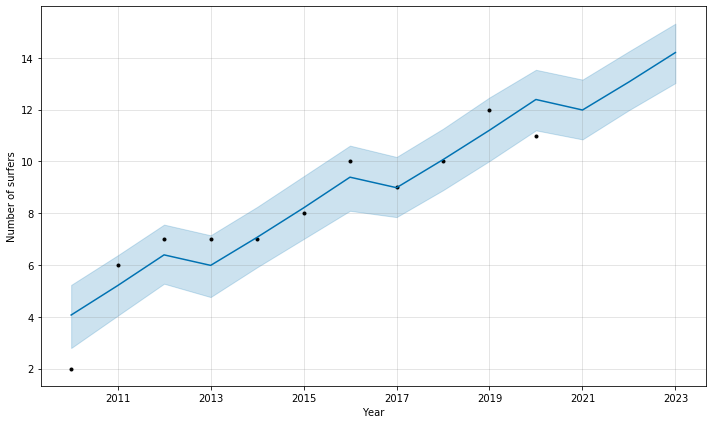

In [44]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(3,freq='AS')
forecast = m.predict(future)
fig = m.plot(forecast)

plt.xlabel('Year')
plt.ylabel('Number of surfers')

plt.savefig('full_df_predictions.jpeg')

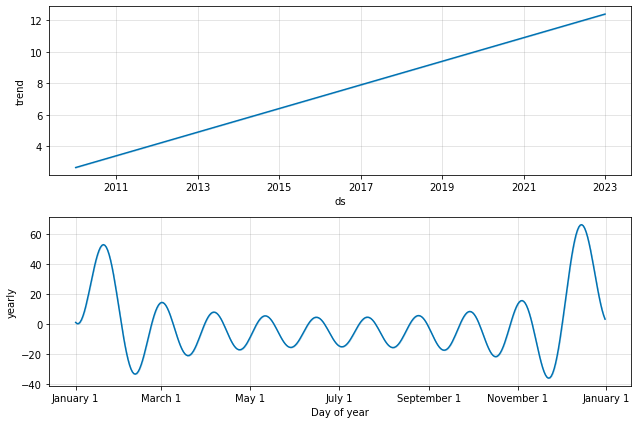

In [39]:
fig = m.plot_components(forecast)

The second graph can not be interpreted as we do not have monthly data. 

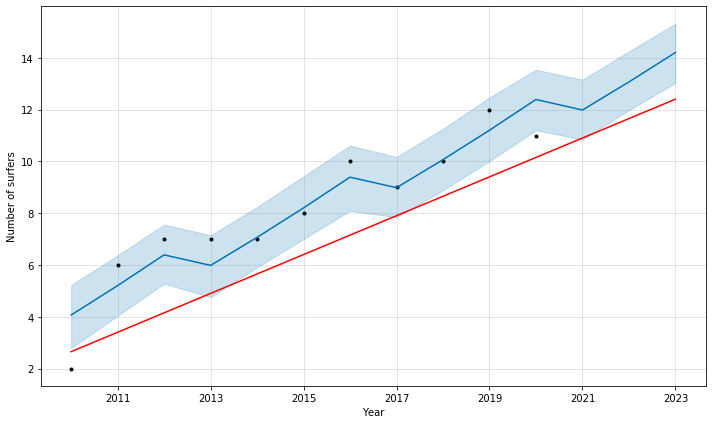

In [45]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

plt.xlabel('Year')
plt.ylabel('Number of surfers')

plt.savefig('change_points.jpeg')

### Let's review the model if we change it to multiplicative

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


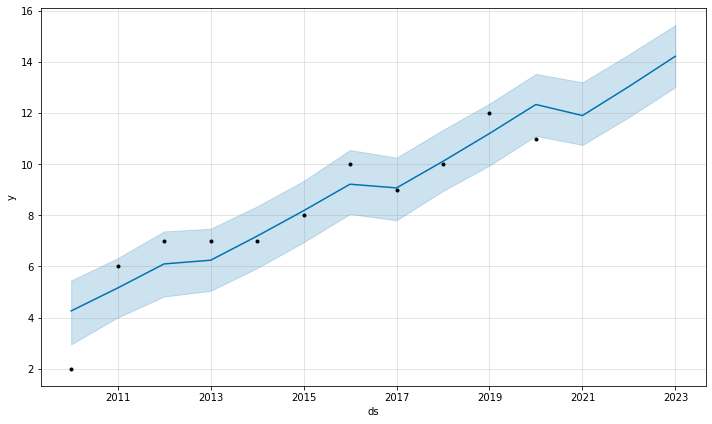

In [41]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(3,freq='AS')
forecast = m.predict(future)
fig = m.plot(forecast)

Not a huge amount of difference, therefore unable to say that multiplicative is definitely the better model. 

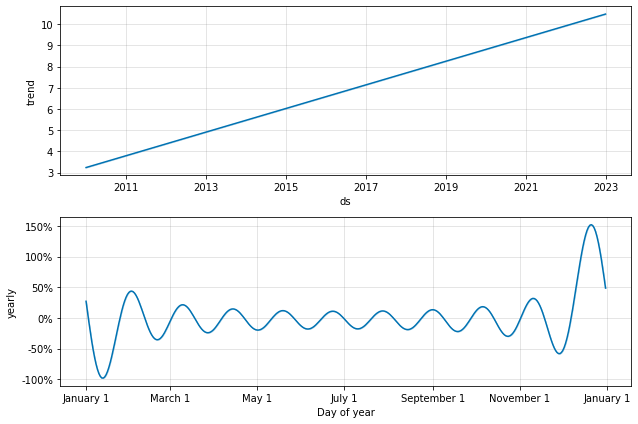

In [42]:
fig = m.plot_components(forecast)